<a href="https://colab.research.google.com/github/abhijithb200/matplotlib/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/Gokulgoky1/linear-regression-data-set/main/Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=40,test_size=0.2)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_value =[]
acc = []
for k in range(1,18):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_x,train_y)
  acc.append(knn.score(test_x,test_y))
  k_value.append(k)
  


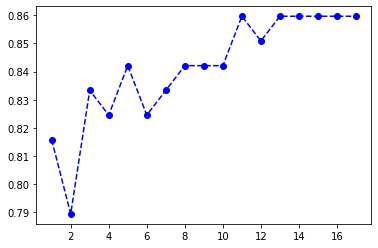

In [ ]:
plt.plot(k_value,acc,'--bo')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(train_x,train_y)
print('Accuracy :',knn.score(test_x,test_y))

Accuracy : 0.8596491228070176


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_x,train_y)
print('Accuracy : ',nb.score(test_x,test_y))

Accuracy :  0.9035087719298246


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(max_iter=1000)
lr.fit(train_x,train_y)
print('Accuracy : ',lr.score(test_x,test_y))

Accuracy :  0.9035087719298246


Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier(estimators=[('knn',knn),('log_reg',lr),('f',nb)])
vot.fit(train_x,train_y)
vot.score(test_x,test_y)

0.8947368421052632

Boosting

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag.fit(train_x,train_y)
bag.score(test_x,test_y)

0.8947368421052632

Bagging

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

bag = AdaBoostClassifier()
bag.fit(train_x,train_y)
bag.score(test_x,test_y)

0.9122807017543859